In [51]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img , img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, MaxPooling2D
import numpy as np
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def load_images(directory):
    image_path = []
    labels = []
    for label in os.listdir(directory):
        for imagename in os.listdir(os.path.join(directory, label)):
            image_path.append(os.path.join(directory, label, imagename))
            labels.append(label)
        print(label, 'Completed')
    return image_path, labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = load_images(TRAIN_DIR)

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


In [6]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = load_images(TEST_DIR)

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


In [8]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [10]:
from tqdm.notebook import tqdm

In [14]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode="grayscale")
        img = img_to_array(img)
        features.append(np.array(img))
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features
    

In [34]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [35]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [36]:
x_train = train_features/255.0
x_test = test_features/255.0

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [39]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [40]:
num_classes = 7
y_train = to_categorical(y_train, num_classes = num_classes)
y_test = to_categorical(y_test, num_classes = num_classes)

In [41]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 672s 3s/step - accuracy: 0.2324 - loss: 1.8413 - val_accuracy: 0.2598 - val_loss: 1.7967
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 681s 3s/step - accuracy: 0.2495 - loss: 1.7946 - val_accuracy: 0.3170 - val_loss: 1.6829
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 636s 3s/step - accuracy: 0.3112 - loss: 1.6810 - val_accuracy: 0.4183 - val_loss: 1.5087
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 569s 3s/step - accuracy: 0.3926 - loss: 1.5415 - val_accuracy: 0.4762 - val_loss: 1.3729
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 705s 3s/step - accuracy: 0.4409 - loss: 1.4448 - val_accuracy: 0.4959 - val_loss: 1.3081
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 615s 3s/step - accuracy: 0.4581 - loss: 1.3923 - val_accuracy: 0.5142 - val_loss: 1.2763
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 571s 3s/step - accuracy: 0.4840 - loss: 1.3447 - val_accuracy: 0.5224 - val_loss: 1.2624
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 563s 2s/step - accuracy: 0.4936 - loss: 1.3180 - 

KeyboardInterrupt: 

In [45]:
from keras.models import model_from_json

In [46]:
json_file = model.to_json()
with open('EmotionDetection.json', 'w') as file:
    file.write(json_file)
model.save('EmotionDetection.h5')

In [47]:
label = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [48]:
def predict_emotion(image_path):
    img = load_img(image_path, color_mode="grayscale")
    img = img_to_array(img)
    img = img.reshape(1, 48, 48, 1)
    img = img/255.0
    prediction = model.predict(img)
    return label[np.argmax(prediction)]


Original Label: Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted Label: Happy
Correct Prediction


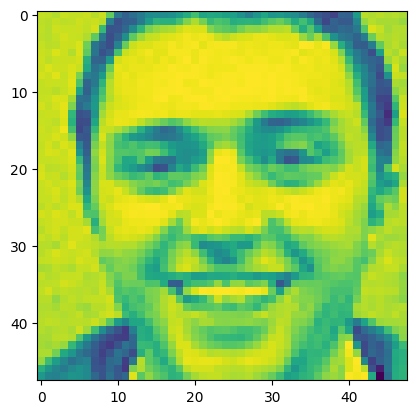

In [54]:
image_path = 'images/test/happy/30.jpg'
print("Original Label: Happy")
img = predict_emotion(image_path)
prediction = predict_emotion(image_path)
print("Predicted Label:", prediction)
print("Correct Prediction") if img == "Happy" else print("Incorrect Prediction")
plt.imshow(load_img(image_path, color_mode="grayscale"))